<a href="https://colab.research.google.com/github/lukeolson/mse598dm-python-data/blob/main/visualizing/scrubbing-data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/lukeolson/mse598dm-python-data/raw/main/visualizing/random_map.png" width="700px;" alt="quad"/>

#  Scrubbing data and visualizing

## Objectives

### Objectives

1. Retrieve data and place in a pandas dataframe
2. Determine modifications needed in the data 
3. Match the data to visualization package

### Example Questions

1. How can we retrieve data from a webpage?
2. How can we parse hhtml?
3. What is a MultiIndex in Pandas?
4. What is a Choropleth map?

## Highlevel topics

- Data retrieval
- Data storage
- Data manipulation
- Visualization

## What to hand in
- As far as you can get!
- What did you learn about scrubbing data today?
    - 1. Tools like `pandas` and `beautifulsoup` make extracting data from webpages quick and easy!
    - 2. We can use `folium` to make nice plots of geographical data!
    - 3. It's important to check the attributes and values in your data files to make sure the functions you use to plot give you the correct figures!

## Synopsis

You're a structural engineer working on a team that analyses the bridge infrastructure in the US.  To make a convincing argument, you are constructing a map of the current bridge conditions across the US.

#### Your Task

Your goal is to plot the bridge conditions at the state level.

## Datasets

In this session two datasets will be used:
- Bridge Condition by Highway System 2019
    - https://www.fhwa.dot.gov/bridge/nbi/no10/condition19.cfm
- Bridge Condition by County 2019
    - https://www.fhwa.dot.gov/bridge/nbi/no10/county19.cfm
- In addition you will use the state/county level geo files:
    - `us-states.json`: https://github.com/python-visualization/folium/tree/master/examples/data
    - http://eric.clst.org/tech/usgeojson/

## Getting Started

We will introduce four new packages in this lesson:

- `requests` is a package the makes URL requests *easy*.  Give it a URL and it retrieves the page.
- `bs4` or BeautifulSoup parses an html file and places it in a convenient structure
- `json` is a package for reading structured JSON files
- `folium` is one of many packages that can be used to plot information on a geographical map

In [1]:
import folium         # visualizing maps
import os
import pandas as pd   # data frames
import bs4            # parse html
import requests       #
import json           # structured data
from IPython.display import HTML, display

In [2]:
m = folium.Map(
    location=[40.114942, -88.226492],
    #tiles='Stamen Toner',
    tiles="Stamen Terrain",
    zoom_start=13
)

m

## First grab the webpage

Here we'll do two things:

1. retrieve the raw html of the webpage; and
2. parse the html to make a structured `soup`

In [3]:
url = 'https://www.fhwa.dot.gov/bridge/nbi/no10/condition21.cfm'
r = requests.get(url)                  # grab the html source
html = r.text                          # as text
soup = bs4.BeautifulSoup(html, 'lxml') # make a parseable "tree" of html

## <font color="red"> ____________________ </font>
We can do any number of things with `soup` at this point.  We can scrub for emails, find links, extract figures, etc.  In this case we wish to find all of the tables in the html.  `<table>` and `<table class="something">` are both examples of tags that we wish to find --- bs4 makes this easy -- try it with `find_all` (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-using-tag-names)

```
table = ...
```
## <font color="red"> Try it! $\downarrow$</font>

In [4]:
table = soup.find_all('table')[0]
display(HTML(str(table)))

## <font color="red"> ____________________ </font>
If you have `table`, you can `find_all` on the resulting markup.
```
rows = table.find_all()
```

Use this to find all rows (marked with `tr`) in the table.

## <font color="red"> Try it! $\downarrow$</font>

In [5]:
rows = table.find_all('tr')

Let's print it:

In [6]:
print(rows[0])
print(rows[1])
print(rows[2])

<tr>
<th rowspan="2" scope="col">State</th>
<th colspan="4" scope="colgroup">Bridge Counts</th>
<th colspan="4" scope="colgroup">Bridge Area (Square Meters)</th>
</tr>
<tr>
<th scope="col">All</th>
<th scope="col">Good</th>
<th scope="col">Fair</th>
<th scope="col">Poor</th>
<th scope="col">All</th>
<th scope="col">Good</th>
<th scope="col">Fair</th>
<th scope="col">Poor</th>
</tr>
<tr>
<th class="left" scope="row">ALABAMA</th>
<td class="txtright">16,164</td> <td class="txtright">6,550</td> <td class="txtright">9,028</td> <td class="txtright">586</td> <td class="txtright">9,979,973</td> <td class="txtright">3,655,411</td> <td class="txtright">6,173,319</td> <td class="txtright">151,243</td>
</tr>


### One approach

One approach is to zip through the rows, then parse each of the columns.  We may do this like the following:

In [7]:
for row in rows:
    
    # find all 'th' headers
    state_name = row.find('th', {"class": "left"})
    if state_name is not None:
        
        # get the state name
        state_name = state_name.text
        print(state_name)
        
        # get the next four data rows
        count = row.findAll('td')[:4]
        count = [int(c.text.replace(',','')) for c in count]
        print(count)

ALABAMA
[16164, 6550, 9028, 586]
ALASKA
[1632, 716, 782, 134]
ARIZONA
[8467, 5275, 3075, 117]
ARKANSAS
[12941, 6234, 6028, 679]
CALIFORNIA
[25737, 12224, 12020, 1493]
COLORADO
[8869, 3063, 5337, 469]
CONNECTICUT
[4361, 1249, 2881, 231]
DELAWARE
[875, 291, 567, 17]
DISTRICT OF COLUMBIA
[246, 74, 165, 7]
FLORIDA
[12680, 8052, 4169, 459]
GEORGIA
[14987, 11054, 3614, 319]
HAWAII
[1162, 265, 810, 87]
IDAHO
[4561, 1322, 3001, 238]
ILLINOIS
[26846, 12848, 11593, 2405]
INDIANA
[19337, 7866, 10389, 1082]
IOWA
[23870, 9354, 10012, 4504]
KANSAS
[24925, 13335, 10313, 1277]
KENTUCKY
[14410, 4089, 9331, 990]
LOUISIANA
[12782, 5931, 5220, 1631]
MAINE
[2485, 728, 1443, 314]
MARYLAND
[5446, 1789, 3404, 253]
MASSACHUSETTS
[5245, 1321, 3468, 456]
MICHIGAN
[11284, 4091, 5953, 1240]
MINNESOTA
[13496, 7857, 5021, 618]
MISSISSIPPI
[16788, 9921, 5693, 1174]
MISSOURI
[24590, 9654, 12718, 2218]
MONTANA
[5266, 1600, 3301, 365]
NEBRASKA
[15348, 7966, 6102, 1280]
NEVADA
[2067, 1070, 968, 29]
NEW HAMPSHIRE
[2527, 1

### Another (easier) approach

## <font color="red"> ____________________ </font>
The previous approach is often necessary.  Dirty data, incomplete html, different formats, etc often force us to parse the html by hand.  However in the case of a table, Pandas can be used directly:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html

How can we use pandas to read the soup table?
## <font color="red"> Try it! $\downarrow$</font>

In [8]:
df = pd.read_html(url)[0]
#pd.read_html(str(table))[0] also works

Print the dataframe:

In [9]:
df

State Bridge Counts                         \
                   State           All    Good    Fair   Poor   
0                ALABAMA         16164    6550    9028    586   
1                 ALASKA          1632     716     782    134   
2                ARIZONA          8467    5275    3075    117   
3               ARKANSAS         12941    6234    6028    679   
4             CALIFORNIA         25737   12224   12020   1493   
5               COLORADO          8869    3063    5337    469   
6            CONNECTICUT          4361    1249    2881    231   
7               DELAWARE           875     291     567     17   
8   DISTRICT OF COLUMBIA           246      74     165      7   
9                FLORIDA         12680    8052    4169    459   
10               GEORGIA         14987   11054    3614    319   
11                HAWAII          1162     265     810     87   
12                 IDAHO          4561    1322    3001    238   
13              ILLINOIS         26846   12848   11593   2405   
14               INDIANA         19337    7866   10389   1082   
15                  IOWA         23870    9354   10012   4504   
16                KANSAS         24925   13335   10313   1277   
17              KENTUCKY         14410    4089    9331    990   
18             LOUISIANA         12782    5931    5220   1631   
19                 MAINE          2485     728    1443    314   
20              MARYLAND          5446    1789    3404    253   
21         MASSACHUSETTS          5245    1321    3468    456   
22              MICHIGAN         11284    4091    5953   1240   
23             MINNESOTA         13496    7857    5021    618   
24           MISSISSIPPI         16788    9921    5693   1174   
25              MISSOURI         24590    9654   12718   2218   
26               MONTANA          5266    1600    3301    365   
27              NEBRASKA         15348    7966    6102   1280   
28                NEVADA          2067    1070     968     29   
29         NEW HAMPSHIRE          2527    1344     989    194   
30            NEW JERSEY          6798    1809    4507    482   
31            NEW MEXICO          4025    1466    2351    208   
32              NEW YORK         17555    6355    9528   1672   
33        NORTH CAROLINA         18877    7840    9712   1325   
34          NORTH DAKOTA          4285    2046    1758    481   
35                  OHIO         27151   16493    9324   1334   
36              OKLAHOMA         23220    9898   11026   2296   
37                OREGON          8235    2800    5053    382   
38          PENNSYLVANIA         23166    7705   12263   3198   
39          RHODE ISLAND           779     168     475    136   
40        SOUTH CAROLINA          9395    4142    4754    499   
41          SOUTH DAKOTA          5886    1943    2925   1018   
42             TENNESSEE         20331    8689   10801    841   
43                 TEXAS         55175   27807   26579    789   
44                  UTAH          3056    1005    1988     63   
45               VERMONT          2836    1494    1274     68   
46              VIRGINIA         13997    4644    8823    530   
47            WASHINGTON          8358    4331    3626    401   
48         WEST VIRGINIA          7314    1719    4105   1490   
49             WISCONSIN         14307    7289    6031    987   
50               WYOMING          3114     920    1964    230   
51                  GUAM            10       2       6      2   
52           PUERTO RICO          2334     426    1626    282   
53   U.S. VIRGIN ISLANDS            24       4      14      6   
54                TOTALS        619622  278128  297908  43586   

   Bridge Area (Square Meters)                                  
                           All       Good       Fair      Poor  
0                      9979973    3655411    6173319    151243  
1                       757896     269361     436844     51692  
2                      6069459    3327139    2665058 

Now lets just take the state name and the bridge counts to make the dataframe a bit more manageable:

In [10]:
dfcounts = df[['State','Bridge Counts']].copy()
dfcounts

State Bridge Counts                       
                   State           All    Good    Fair   Poor
0                ALABAMA         16164    6550    9028    586
1                 ALASKA          1632     716     782    134
2                ARIZONA          8467    5275    3075    117
3               ARKANSAS         12941    6234    6028    679
4             CALIFORNIA         25737   12224   12020   1493
5               COLORADO          8869    3063    5337    469
6            CONNECTICUT          4361    1249    2881    231
7               DELAWARE           875     291     567     17
8   DISTRICT OF COLUMBIA           246      74     165      7
9                FLORIDA         12680    8052    4169    459
10               GEORGIA         14987   11054    3614    319
11                HAWAII          1162     265     810     87
12                 IDAHO          4561    1322    3001    238
13              ILLINOIS         26846   12848   11593   2405
14               INDIANA         19337    7866   10389   1082
15                  IOWA         23870    9354   10012   4504
16                KANSAS         24925   13335   10313   1277
17              KENTUCKY         14410    4089    9331    990
18             LOUISIANA         12782    5931    5220   1631
19                 MAINE          2485     728    1443    314
20              MARYLAND          5446    1789    3404    253
21         MASSACHUSETTS          5245    1321    3468    456
22              MICHIGAN         11284    4091    5953   1240
23             MINNESOTA         13496    7857    5021    618
24           MISSISSIPPI         16788    9921    5693   1174
25              MISSOURI         24590    9654   12718   2218
26               MONTANA          5266    1600    3301    365
27              NEBRASKA         15348    7966    6102   1280
28                NEVADA          2067    1070     968     29
29         NEW HAMPSHIRE          2527    1344     989    194
30            NEW JERSEY          6798    1809    4507    482
31            NEW MEXICO          4025    1466    2351    208
32              NEW YORK         17555    6355    9528   1672
33        NORTH CAROLINA         18877    7840    9712   1325
34          NORTH DAKOTA          4285    2046    1758    481
35                  OHIO         27151   16493    9324   1334
36              OKLAHOMA         23220    9898   11026   2296
37                OREGON          8235    2800    5053    382
38          PENNSYLVANIA         23166    7705   12263   3198
39          RHODE ISLAND           779     168     475    136
40        SOUTH CAROLINA          9395    4142    4754    499
41          SOUTH DAKOTA          5886    1943    2925   1018
42             TENNESSEE         20331    8689   10801    841
43                 TEXAS         55175   27807   26579    789
44                  UTAH          3056    1005    1988     63
45               VERMONT          2836    1494    1274     68
46              VIRGINIA         13997    4644    8823    530
47            WASHINGTON          8358    4331    3626    401
48         WEST VIRGINIA          7314    1719    4105   1490
49             WISCONSIN         14307    7289    6031    987
50               WYOMING          3114     920    1964    230
51                  GUAM            10       2       6      2
52           PUERTO RICO          2334     426    1626    282
53   U.S. VIRGIN ISLANDS            24       4      14      6
54                TOTALS        619622  278128  297908  43586

### A MultiIndex?!

If we take a look a the column names we run into another type in Pandas: a MultiIndex.

In [11]:
dfcounts.columns

MultiIndex([(        'State', 'State'),
            ('Bridge Counts',   'All'),
            ('Bridge Counts',  'Good'),
            ('Bridge Counts',  'Fair'),
            ('Bridge Counts',  'Poor')],
           )

One easy thing to do in this case (mainly to make referencing a specific column easier) is to reduce to the column header to a simple `Index`.  Here we'll just use the second level of the MultiIndex:

In [12]:
dfcounts.columns = dfcounts.columns.get_level_values(1)
print(dfcounts.columns)
dfcounts

Index(['State', 'All', 'Good', 'Fair', 'Poor'], dtype='object')


,State,All,Good,Fair,Poor
0,ALABAMA,16164,6550,9028,586
1,ALASKA,1632,716,782,134
2,ARIZONA,8467,5275,3075,117
3,ARKANSAS,12941,6234,6028,679
4,CALIFORNIA,25737,12224,12020,1493
5,COLORADO,8869,3063,5337,469
6,CONNECTICUT,4361,1249,2881,231
7,DELAWARE,875,291,567,17
8,DISTRICT OF COLUMBIA,246,74,165,7
9,FLORIDA,12680,8052,4169,459


### Look ahead

Looking ahead to our mapping, we'll be using a GEO file, and each state name will be in the form of `Illinois` or `New Mexico`, etc.  However, in the data frame of bridge data, notice that each state name is in all caps. To fix this, we'll use the `.title()` command and return to lesson1:

In [13]:
'NEW MEXICO'.title()

'New Mexico'

In [14]:
'U.S. VIRGIN ISLANDS'.title()

'U.S. Virgin Islands'

## <font color="red"> ____________________ </font>

Let's use this to change the string in the `State` column:

## <font color="red"> Try it! $\downarrow$</font>

In [15]:
def f(x):
    try:
        x = x.title()
    except:
        x = ''
        raise ValueError('Not a string!')
    return x
    #pass # <-- have it return something
dfcounts['State'] = dfcounts['State'].apply(f)

Now look at our modified data:

In [16]:
dfcounts

,State,All,Good,Fair,Poor
0,Alabama,16164,6550,9028,586
1,Alaska,1632,716,782,134
2,Arizona,8467,5275,3075,117
3,Arkansas,12941,6234,6028,679
4,California,25737,12224,12020,1493
5,Colorado,8869,3063,5337,469
6,Connecticut,4361,1249,2881,231
7,Delaware,875,291,567,17
8,District Of Columbia,246,74,165,7
9,Florida,12680,8052,4169,459


# Your Turn:  Displaying the Data on a Map

Your job is to visualize the information about the bridges on a map (choropleth visualization).  To get you started, this section will go through some examples first of some basic maps with other data.  Go through these examples to get an understanding for the map visualization then complete the 2 tasks at the bottom.

## Example 1:  Our first map

Let's make a map instance with `folium`. Here we set the lat/long coordinates to the Beckman Quad.  The tiles parameter is used to determine they style of the map.  

(You can use `folium.Map?` in this notebook to experiment with different map types -- neat!).  

In [17]:
folium.Map?

In [18]:
m = folium.Map(
    location=[40.114942, -88.226492],
    tiles='Stamen Toner',
    zoom_start=13
)

m

The above example illustrated a map for some specific lat/long coordinates.  In practice, we'll want to display some information on the map.  We'll start in the next example with a simple visualization of data on a map.

## Example 2:  Starting Map with State Data (3 states)

Let's start with a basic visualization of data for 3 states: Iowa, Illinois, and Colorado.  Let's assume we have the following dataframe with some data for a few states. 

In [19]:
df = pd.DataFrame(
    [
        ['Iowa', 'Illinois', 'Colorado'],
        [50, 1, 100]],
    index=['State', 'Some Value']
).T

print(df)

      State Some Value
0      Iowa         50
1  Illinois          1
2  Colorado        100


### State JSON Info

To plot on map with Folium, a JSON file is used to describe the polygons that will represent each state.  For example,  Illinois is composed of a list of coordinates -- [check it out](https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json):

In [20]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
r = requests.get(url) # grab the source from the url
state_geo = r.json()  # convert to `json`
state_geo['features'][11]

{'type': 'Feature',
 'id': 'ID',
 'properties': {'name': 'Idaho'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-116.04751, 49.000239],
    [-116.04751, 47.976051],
    [-115.724371, 47.696727],
    [-115.718894, 47.42288],
    [-115.527201, 47.302388],
    [-115.324554, 47.258572],
    [-115.302646, 47.187372],
    [-114.930214, 46.919002],
    [-114.886399, 46.809463],
    [-114.623506, 46.705401],
    [-114.612552, 46.639678],
    [-114.322274, 46.645155],
    [-114.464674, 46.272723],
    [-114.492059, 46.037214],
    [-114.387997, 45.88386],
    [-114.568736, 45.774321],
    [-114.497536, 45.670259],
    [-114.546828, 45.560721],
    [-114.333228, 45.456659],
    [-114.086765, 45.593582],
    [-113.98818, 45.703121],
    [-113.807441, 45.604536],
    [-113.834826, 45.522382],
    [-113.736241, 45.330689],
    [-113.571933, 45.128042],
    [-113.45144, 45.056842],
    [-113.456917, 44.865149],
    [-113.341901, 44.782995],
    [-113.133778, 44.772041],
    [-113.002331, 44.

## Just plot it
We could just plot this polygon data on our own:

(-91.705796, -87.29576399999999, 36.70752035, 42.786376649999994)

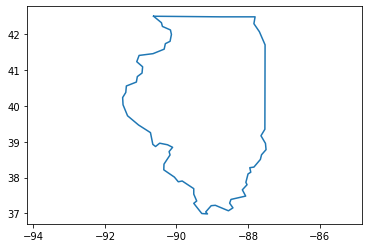

In [21]:
import matplotlib.pyplot as plt
import numpy as np
coords = state_geo['features'][12]['geometry']['coordinates'][0]
coords = np.array(coords)
plt.plot(coords[:,0], coords[:,1])
plt.axis('equal')

We printed just Illinois above, but  `state_geo` contains the polygons for each of the states.

### Creating Map with State Data

To create a Choropleth, we first initialize a map with folium like we did in the basic example above.  Then, we call `folium.Choropleth()`. 

**What is a Choropleth?** https://en.wikipedia.org/wiki/Choropleth_map

The call to set the `Choropleth` map has 4 important entries:

- `geo_data=state_geo`, here we set the geo data.
- `data=df`, here we set the data *source* (the stuff we'll plot on each state)
- `columns=['State', 'Some Value']`, where to find the state name or state id and the numbers to visualize (in `data`)
- `key_on='feature.properties.name'`, how the entries are represented in the JSON.  For the state geo_data json file, this will be either `'feature.id'` (abbreviation) or `'feature.properties.name'` (name), depending on whether our dataframe uses state names or abbreviations. 

The other parameters control specifics of looks of the visualization (opacity, coloring).

In [22]:
m = folium.Map(location=[44, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df,
    columns=['State', 'Some Value'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.6,
    line_opacity=0.2,
).add_to(m)

folium.LayerControl().add_to(m)

m

## Example 3:  Full Example with Unemployment Data
## <font color="red"> ____________________ </font>

For this next part we'll take straight out of the Folium examples.

As before, we use the same json state geo data.  This example reads in unemployment data into a pandas dataframe.  The call to `folium.Choropleth()` is roughly the same as the above, except this dataframe, `state_data`, uses abbreviations not full names, so `key_on=` a different value.  Additionally, the coloring is a little different and the colorbar is labeled.

## <font color="red"> Try it! $\downarrow$</font>

In [23]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
state_geo = requests.get(url).json()

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(url)

m = folium.Map(location=[48, -102], zoom_start=5)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    # vvvv fill this in
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    #######
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m


# Your Tasks:
Now that you've seen some examples, it's time for you to visualize the bridge data that is the topic of this lesson.

Your task is to create 2 different choropleth visualizations based on the bridge data (each is described below).

## Task \#1:
## <font color="red"> ____________________ </font>

Create a choropleth visualization that illustrates the number of bridges in each state.

Hint:  Think about what the visualization should look like based on the data.  If your visualized results are not as expected, it may help to look at the dataframe to identify what is happening.  Notice any rows that aren't simply state data?
## <font color="red"> Try it! $\downarrow$</font>

In [24]:
dfcounts.drop(54, inplace=True)

In [25]:
dfcounts

,State,All,Good,Fair,Poor
0,Alabama,16164,6550,9028,586
1,Alaska,1632,716,782,134
2,Arizona,8467,5275,3075,117
3,Arkansas,12941,6234,6028,679
4,California,25737,12224,12020,1493
5,Colorado,8869,3063,5337,469
6,Connecticut,4361,1249,2881,231
7,Delaware,875,291,567,17
8,District Of Columbia,246,74,165,7
9,Florida,12680,8052,4169,459


In [26]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
state_geo = requests.get(url).json()

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    # fill this in vvvv
    data=dfcounts,
    columns=['State', 'All'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

folium.LayerControl().add_to(m)

m

## Task \#2

## <font color="red"> ____________________ </font>
Create a different choropleth visualization that illustrates the percentage of bridges in each state rated as poor.  

Hint:  this value is not currently in the dataframe of bridge data -- you'll need to compute it first

## <font color="red"> Try it! $\downarrow$</font>

In [27]:
dfcounts['Percent in Poor Condition'] = dfcounts['Poor']/dfcounts['All'] * 100
dfcounts['Percent in Fair Condition'] = dfcounts['Fair']/dfcounts['All'] * 100
dfcounts['Percent in Good Condition'] = dfcounts['Good']/dfcounts['All'] * 100

In [28]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=dfcounts,
    columns=['State', 'Percent in Poor Condition'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percent of Bridges Ranked as Poor (%)'
).add_to(m)

folium.LayerControl().add_to(m)
m

In [29]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=dfcounts,
    columns=['State', 'Percent in Fair Condition'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percent of Bridges Ranked as Poor (%)'
).add_to(m)

folium.LayerControl().add_to(m)
m

In [30]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=dfcounts,
    columns=['State', 'Percent in Good Condition'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percent of Bridges Ranked as Poor (%)'
).add_to(m)

folium.LayerControl().add_to(m)
m